##  Download and Explore New York city and its Boroughs Cuisine dataset

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays
import requests
%matplotlib inline
from bs4 import BeautifulSoup
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

Matplotlib version:  2.1.0
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    wordcloud-1.4.1            |           py35_0         324 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following NEW packages will be INSTALLED:

    wordcloud:       1.4.1-py35_0      conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.1.23-0                   --> 2019.3.9-hecc5488_0 conda-forge
    cer

<b> This data is extracted from the wikipedia Page - https://en.wikipedia.org/wiki/Cuisine_of_New_York_City </b>

In [20]:
import csv
import re
website_url = requests.get('https://en.wikipedia.org/wiki/Cuisine_of_New_York_City').text
soup = BeautifulSoup(website_url,'lxml')
borough = []

headers = ['Borough', 'Neighbourhood', 'Cuisine']

soup1 = soup.find_all('li',class_='toclevel-1')[0].find_all('li')
for i in soup1:
    borough.append(''.join(i.a.text.split(' ')[1:]))
    
print(len(borough))
file = open('NYC_CUISINE.csv','w')
writer = csv.writer(file)
writer.writerow(headers)
for i in range(len(borough)):
    for j in range(len(soup.find_all('div', class_='div-col')[i].find('ul').find_all('li'))):
        n = soup.find_all('div', class_='div-col')[i].find('ul').find_all('li')[j].a.text
        c = soup.find_all('div', class_='div-col')[i].find('ul').find_all('li')[j].text.replace(n,"")[2:]
        writer.writerow([borough[i],n,c])
file.close()
df_cuisine = pd.read_csv('NYC_CUISINE.csv')

  # writer.writerows(row for row in rows if row)

5


In [21]:
df_cuisine.tail()

,Borough,Neighbourhood,Cuisine
64,Manhattan,Waldorf Salad,NaN
65,Manhattan,Doughnut,NaN
66,Manhattan,Delmonico steak,NaN
67,Manhattan,Black and white cookie,NaN
68,Manhattan,"Bacon, egg and cheese sandwich",n a roll


<b> There was html format error while scraping, since error is minute we could do it manually</b>

In [22]:
df_cuisine.replace({'StatenIsland':'Manhattan'}, regex=True,inplace=True)
df_cuisine.tail(30)

,Borough,Neighbourhood,Cuisine
39,Brooklyn,Sunset Park,"Puerto Rican, Chinese, Arab, Mexican and Italian"
40,Brooklyn,Williamsburg,"Italian, Jewish, Dominican and Puerto Rican"
41,Manhattan,Chinatown,Chinese and Vietnamese
42,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese-Cub..."
43,Manhattan,East Village,"Japanese, Korean, Indian and Ukrainian"
44,Manhattan,Greenwich Village,Italian
45,Manhattan,Harlem,"Italian, African-American, Latin American, We..."
46,Manhattan,Koreatown,Korean
47,Manhattan,Little Italy,Italian
48,Manhattan,Lower East Side,"Puerto Rican, Jewish, Italian, and Latin Amer..."


In [23]:
df_cuisine.drop(df_cuisine.index[52:69],inplace=True)

In [24]:
df2 = pd.DataFrame([['StatenIsland','Port Richmond','Mexican, Indian, Italian'],['StatenIsland', 'Rossville; South Beach; Great Kills','Italian, Russian, Arab and Polish'],['StatenIsland','Tompkinsville',' Italian, Sri Lankan, Pakistani, Indian']],columns=['Borough','Neighbourhood','Cuisine'])



In [25]:
cuisine_final = df_cuisine.append(df2)


In [26]:
cuisine_final['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Queens,13
Manhattan,11
TheBronx,9
StatenIsland,3


## New York City Word Count

In [27]:
cuisine_nyc_wc = df_cuisine[['Cuisine']]
cuisine_nyc_wc

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean (on ..."
1,"Italian, Albanian (also known as ""Arthur Aven..."
2,"Italian, Seafood"
3,"Italian, Albanian"
4,"Filipino (formerly Irish, less so today)"
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, ..."


In [28]:
cuisine_nyc_wc.to_csv('cuisine_nyc_wc.txt', sep=',', index=False)

In [29]:
cuisine_wc = open('cuisine_nyc_wc.txt', 'r').read()

In [30]:
stopwords = set(STOPWORDS)

In [31]:
# instantiate a word cloud object
NYC_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_WC.generate(cuisine_wc)

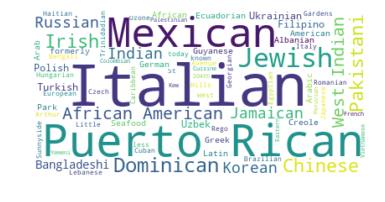

In [32]:
# display the word cloud
plt.imshow(NYC_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in New York City -

    Italian
    Purto Rican
    Mexican
    Jewish
    Indian
    Pakistani
    Dominican



## BROOKLYN CUISINE - WORD CLOUD

In [36]:
Brooklyn_data = cuisine_final[cuisine_final['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighbourhood,Cuisine
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pal..."
1,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puer..."
2,Brooklyn,Bensonhurst,"– Italian, Chinese, Turkish, Russian, Mexican,..."
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani and Ukr..."


In [38]:
cuisine_br_wc = Brooklyn_data[['Cuisine']]
cuisine_br_wc

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pal..."
1,"African-American, Jamaican, Trinidadian, Puer..."
2,"– Italian, Chinese, Turkish, Russian, Mexican,..."
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani and Ukr..."
5,"Puerto Rican, Mexican, Dominican, and Ecuadorian"
6,"Jamaican, West Indian, African-American"
7,Italian
8,"Jamaican, West Indian, and Jewish"
9,"African-American, Dominican, and Puerto Rican"


In [41]:
cuisine_br_wc.to_csv('cuisine_br_wc.txt', sep=',', index=False)



In [43]:

cuisine_br = open('cuisine_br_wc.txt', 'r').read()



In [44]:
stopwords = set(STOPWORDS)

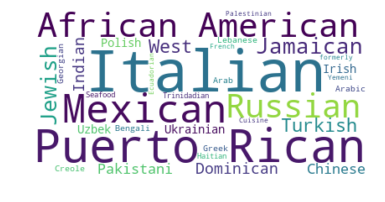

In [45]:
# instantiate a word cloud object
BR_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BR_NYC.generate(cuisine_br)

# display the word cloud
plt.imshow(BR_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in Brooklyn is -

    Italian
    Purto Rican
    Mexican

## QUEENS CUISINE - WORD CLOUD

In [47]:
Queens_data = df_cuisine[df_cuisine['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighbourhood,Cuisine
0,Queens,Astoria,"Greek, Italian, Eastern European, Brazilian, ..."
1,Queens,Bellerose,Indian and Pakistani
2,Queens,Flushing,Chinese and Korean
3,Queens,Forest Hills,"Kew Gardens Hills; Rego Park – Jewish, Russian..."
4,Queens,Howard Beach,Ozone Park – Italian


In [49]:
cuisine_q_wc = Queens_data[['Cuisine']]
cuisine_q_wc

,Cuisine
0,"Greek, Italian, Eastern European, Brazilian, ..."
1,Indian and Pakistani
2,Chinese and Korean
3,"Kew Gardens Hills; Rego Park – Jewish, Russian..."
4,Ozone Park – Italian
5,German and Polish
6,"Indian, Pakistani, Bangladeshi, Colombian, Ec..."
7,"Bangladeshi, Caribbean; African-American; Afr..."
8,"Arab, Chinese, and Italian"
9,"Indian, Guyanese, West Indian, Pakistani, Ban..."


In [50]:
cuisine_q_wc.to_csv('Queens_WC.txt', sep=',', index=False)
queens_wc = open('Queens_WC.txt', 'r').read()
stopwords = set(STOPWORDS)

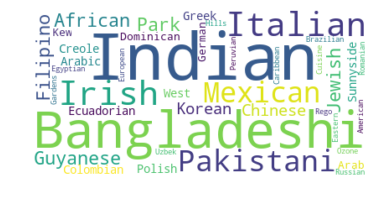

In [51]:
# instantiate a word cloud object
Q_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_NYC.generate(queens_wc)

# display the word cloud
plt.imshow(Q_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()



Most Preferred Food in Queens is -

    Indian
    Bangladeshi
    Italian
    Pkistani



## Manhattan Word Cloud

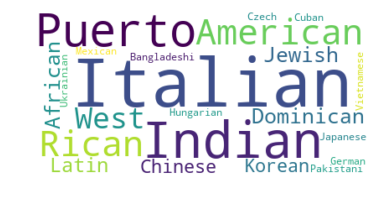

In [52]:
Man_data = df_cuisine[df_cuisine['Borough'] == 'Manhattan'].reset_index(drop=True)
cuisine_man_wc = Man_data['Cuisine']
cuisine_man_wc.to_csv('M_C.txt', sep=',', index=False)
M_WC = open('M_C.txt', 'r').read()
M_WC = open('M_C.txt', 'r').read()
stopwords = set(STOPWORDS)

# instantiate a word cloud object
M_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
M_NYC.generate(M_WC)

# display the word cloud
plt.imshow(M_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()



Most Preferred Food in Manhattan is -

    Italian
    Indian
    American
    Puerto Rican
    



## THE BRONX CUISINE - WORD CLOUD

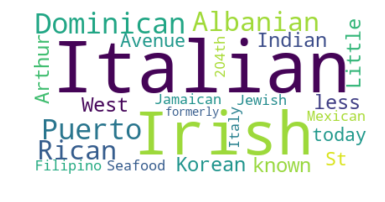

In [53]:
TBR_data = df_cuisine[df_cuisine['Borough'] == 'TheBronx'].reset_index(drop=True)
cuisine_tbr_wc = TBR_data['Cuisine']
cuisine_tbr_wc.to_csv('B_C.txt', sep=',', index=False)
TBR_WC = open('B_C.txt', 'r').read()
TBR_WC = open('B_C.txt', 'r').read()
stopwords = set(STOPWORDS)

# instantiate a word cloud object
TBR_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
TBR_NYC.generate(TBR_WC)

# display the word cloud
plt.imshow(TBR_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()



Most Preferred Food in The Bronx is -

    Italian
    Irish
    Albanian
    Dominican

